In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
path='C:\\Users\\amanc\\Desktop\\python new project\\Machine Learning\\Credit Score Classification\\data\\clean_train.csv'
data=pd.read_csv(path)

In [5]:
data.drop(['Unnamed: 0','Customer_ID','SSN'],axis=1,inplace=True)

In [21]:
data.head(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,17,Lawyer,30625.94,2706.16,6,5,27.0,2,"Credit-Builder Loan, and Home Equity Loan",57,...,Bad,1562.91,33.47750,10 Years and 2 Months,Yes,42.94,158.54875,Low_spent_Large_value_payments,335.37500,Poor
1,25,Mechanic,52312.68,4250.39,6,5,17.0,4,"Not Specified, Home Equity Loan, Credit-Builde...",7,...,Standard,202.68,29.84000,30 Years and 5 Months,Yes,108.37,146.67875,Low_spent_Medium_value_payments,428.74250,Standard
2,18,Media_Manager,113781.39,9549.78,1,4,1.0,0,No Loan,13,...,Good,1030.20,34.84250,15 Years and 3 Months,No,0.00,544.44375,Low_spent_Medium_value_payments,781.23125,Poor
3,43,Doctor,58918.47,5208.87,3,3,17.0,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,...,Standard,473.14,27.65625,15 Years and 3 Months,Yes,123.43,281.08250,High_spent_Large_value_payments,332.64250,Standard
4,43,Mechanic,98620.98,7962.42,3,3,6.0,3,"Student Loan, Debt Consolidation Loan, and Per...",12,...,Good,1233.51,31.93375,17 Years and 3 Months,No,228.02,355.44125,High_spent_Medium_value_payments,472.78125,Standard


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  float64
 3   Monthly_Inhand_Salary     12500 non-null  float64
 4   Num_Bank_Accounts         12500 non-null  int64  
 5   Num_Credit_Card           12500 non-null  int64  
 6   Interest_Rate             12500 non-null  float64
 7   Num_of_Loan               12500 non-null  int64  
 8   Type_of_Loan              12500 non-null  object 
 9   Delay_from_due_date       12500 non-null  int64  
 10  Num_of_Delayed_Payment    12500 non-null  int64  
 11  Changed_Credit_Limit      12500 non-null  float64
 12  Num_Credit_Inquiries      12500 non-null  int64  
 13  Credit_Mix                12500 non-null  object 
 14  Outsta

In [22]:
data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

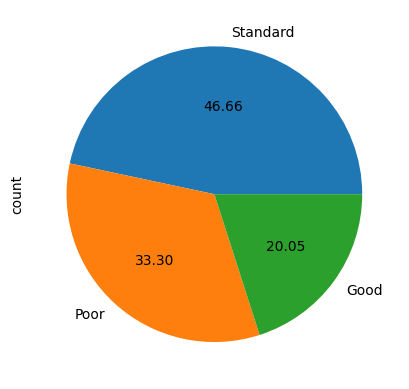

In [7]:
data['Credit_Score'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

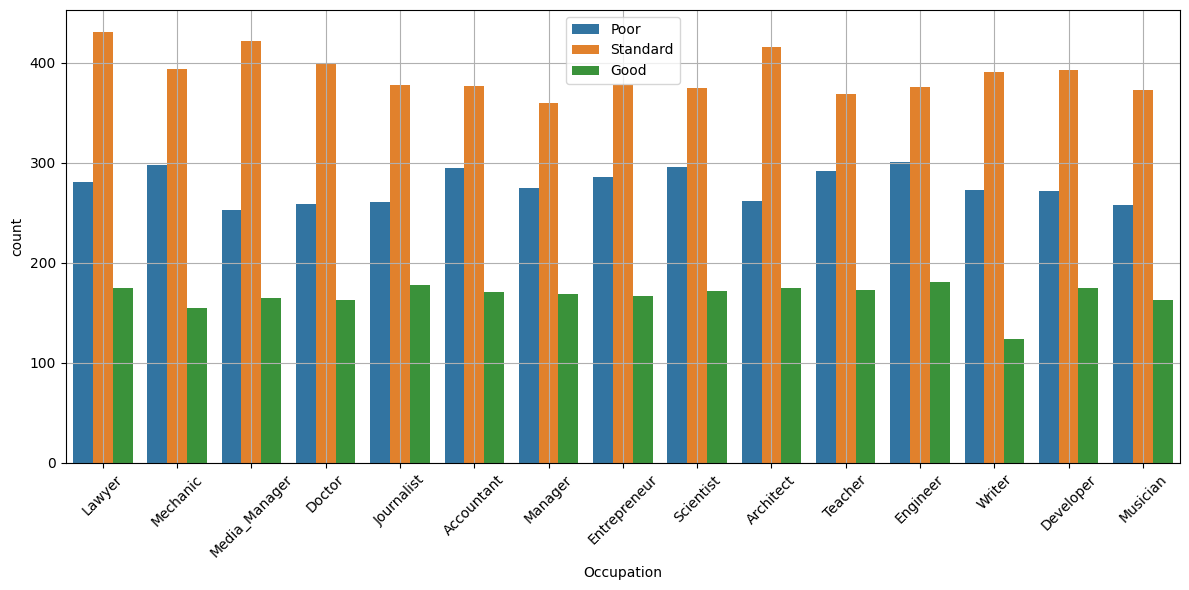

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Occupation',hue='Credit_Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



Text(0, 0.5, 'Credit_Score')

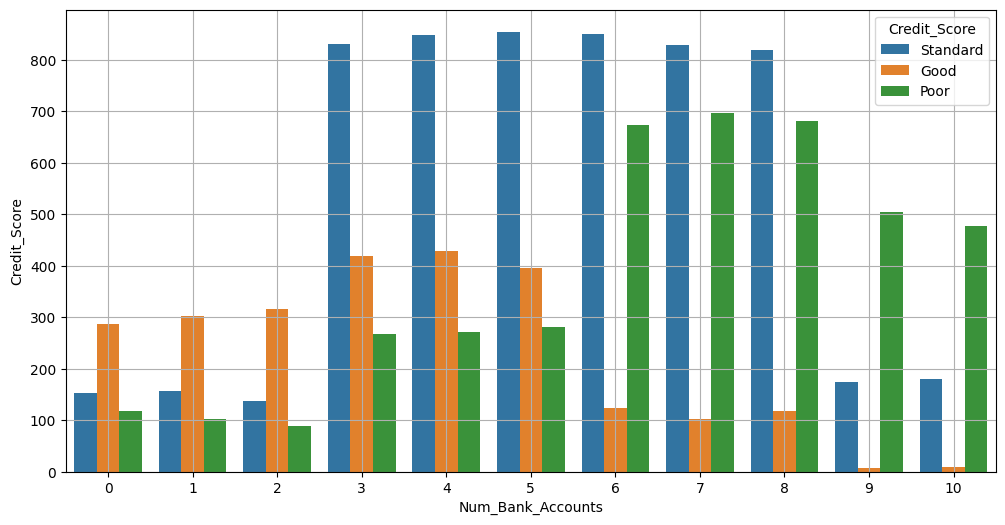

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Num_Bank_Accounts',hue='Credit_Score')
plt.grid(True)
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Credit_Score')


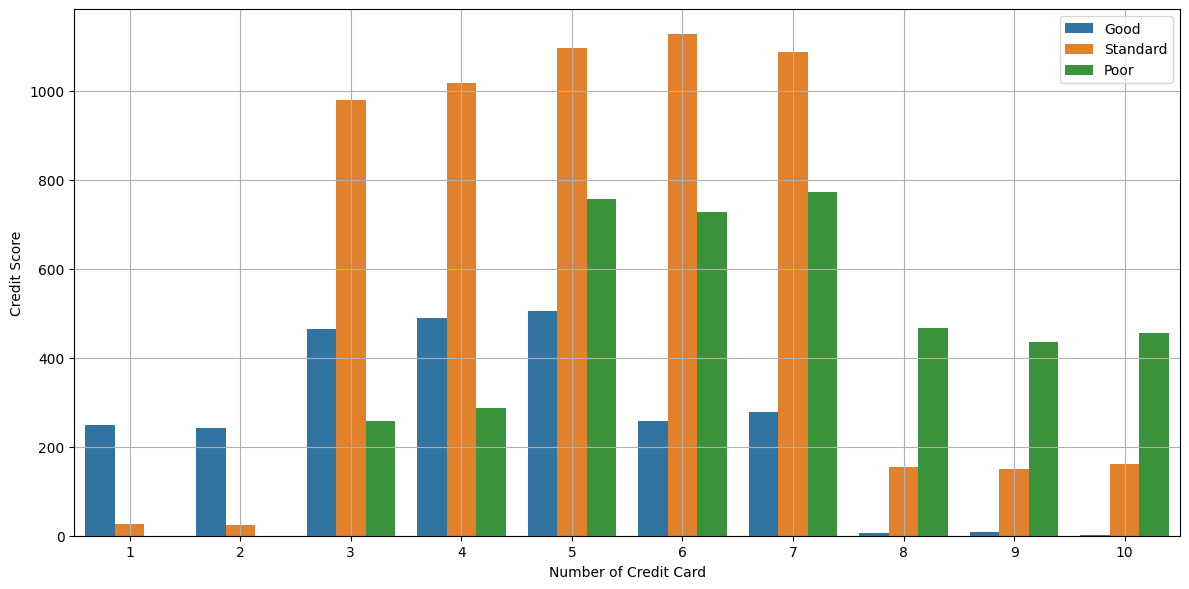

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Num_Credit_Card',hue='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.xlabel('Number of Credit Card')
plt.ylabel('Credit Score')
plt.legend()
plt.show()



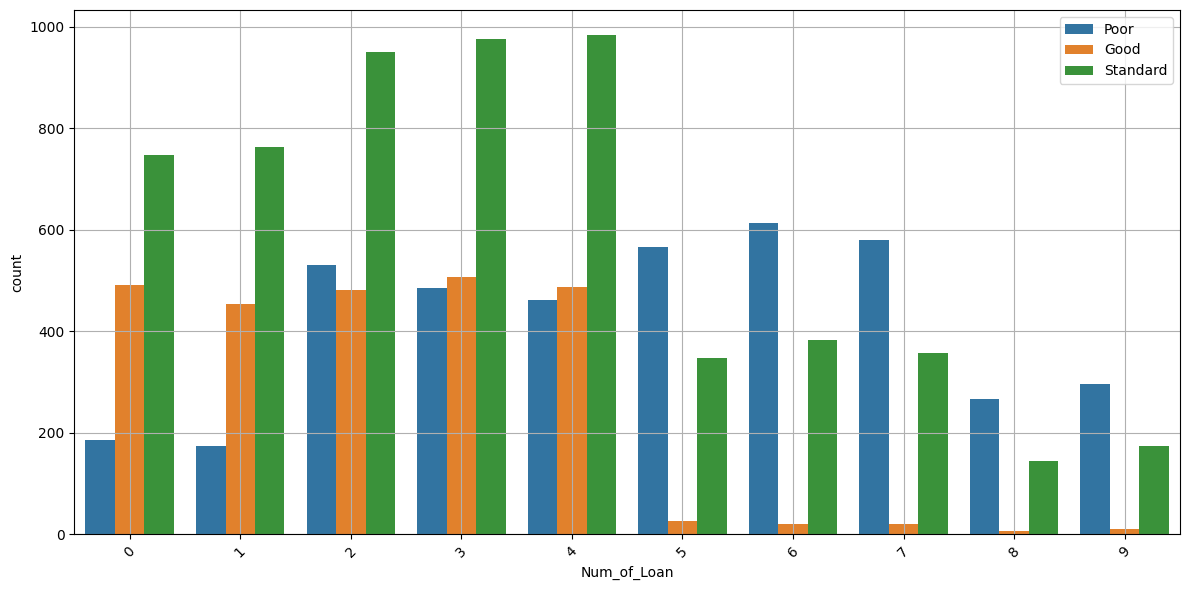

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='Num_of_Loan',hue='Credit_Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



In [89]:

credit_score_mapping = {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}
data['Credit_Score_Category'] = data['Credit_Score'].map(credit_score_mapping)
columns_to_plot=['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']
# Initialize the subplot
fig = make_subplots(rows=len(columns_to_plot), cols=1, subplot_titles=columns_to_plot)

# Plot each box plot with hue based on 'Credit_Score_Category'
for i, column in enumerate(columns_to_plot):
    for score, color in credit_score_mapping.items():
        fig.add_trace(
            go.Box(
                x=data[data['Credit_Score'] == score][column],
                name=f"{column} ({score})",
                marker_color=color,
                orientation='h',
                showlegend=(i==0)  # Show legend only for the first plot
            ),
            row=i+1, col=1
        )

# Update layout
fig.update_layout(
    height=3000,
    width=900,
    title_text="Boxplots of Various Columns by Credit Score Category",
    legend_title_text='Credit Score Category'
)

fig.show()


In [90]:
for column in columns_to_plot:
    fig = px.histogram(data, x=column, marginal='box', title=f'Distribution of {column}', color_discrete_sequence=['skyblue'])
    fig.show()



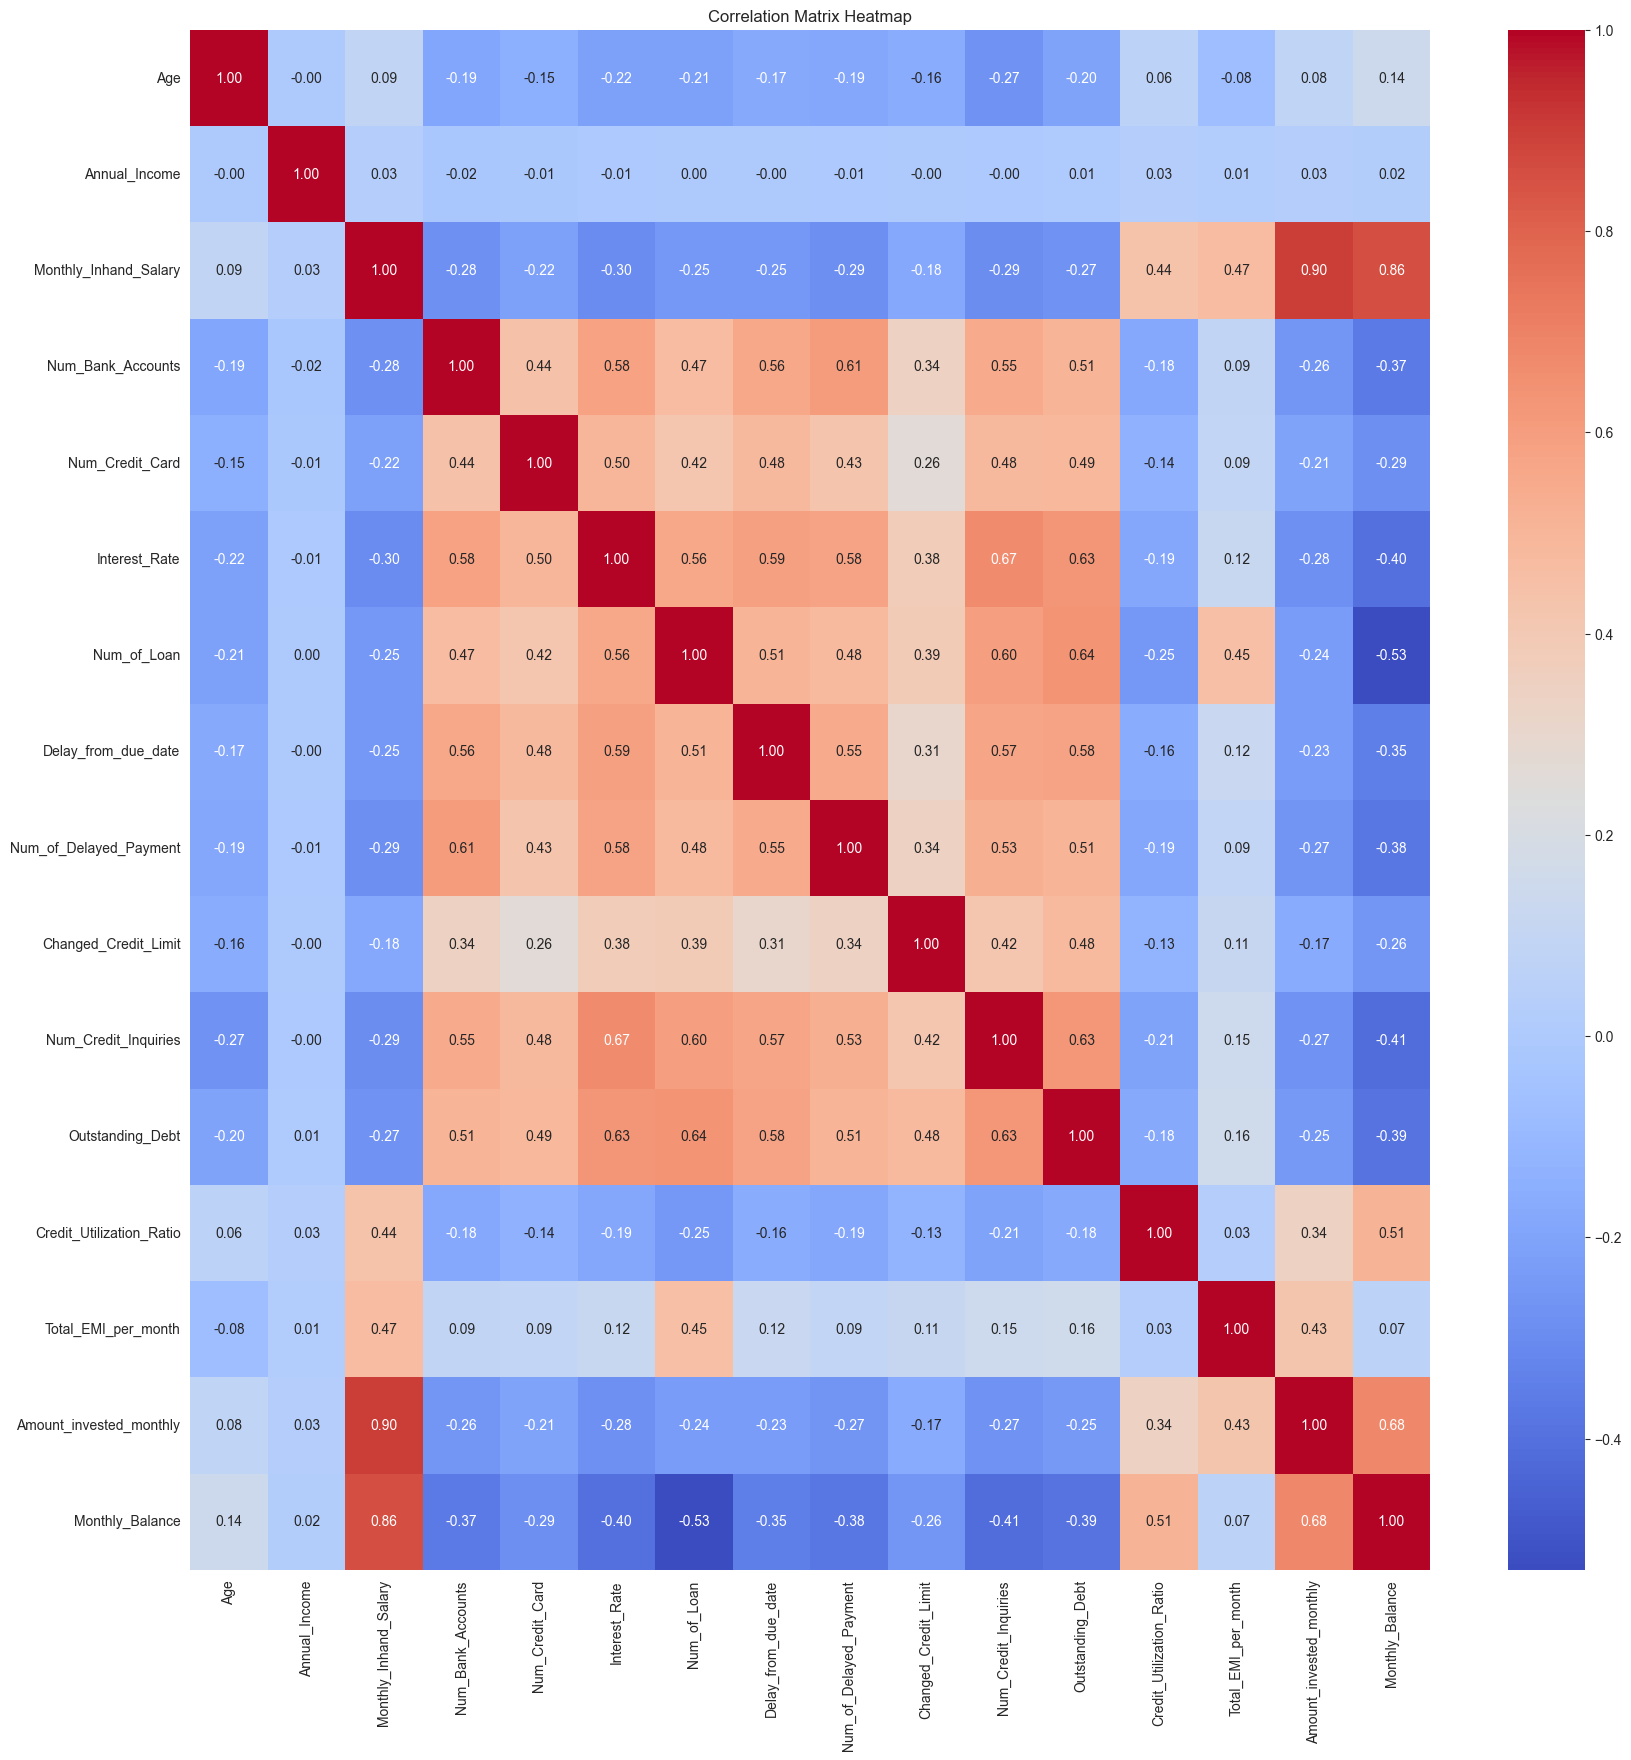

In [91]:
correlation_matrix = data[columns_to_plot].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()